# Formatting Data (geometry)


Working with maps requires that we pay close attention to the operations we can do with the geometries the map presents.

Let's see this geojson file (vector) using **[geopandas](https://geopandas.org/en/stable/getting_started/install.html)**:

In [1]:
import geopandas as gpd

theMapFile="https://github.com/CienciaDeDatosEspacial/mapFiles/raw/main/MapSeattle.geojson"

seattleMap=gpd.read_file(theMapFile)

In [2]:
# verify type
type(seattleMap)

geopandas.geodataframe.GeoDataFrame

In [3]:
# looks like a data frame:
seattleMap.head()

,OBJECTID,TRACT,TRACTCE10,GEOID10,NAME10,NAMELSAD10,ACRES_TOTAL,WATER,SHAPE_Length,SHAPE_Area,geometry
0,1,2500,002500,53033002500,25,Census Tract 25,243.219083,0,16442.968402,1.059462e+07,"POLYGON ((-122.29602 47.69023, -122.29608 47.6..."
1,2,2600,002600,53033002600,26,Census Tract 26,307.584420,0,15936.137058,1.339838e+07,"POLYGON ((-122.30817 47.69031, -122.30947 47.6..."
2,3,5600,005600,53033005600,56,Census Tract 56,737.511727,0,30337.294354,3.212601e+07,"POLYGON ((-122.39300 47.63956, -122.39421 47.6..."
3,4,6800,006800,53033006800,68,Census Tract 68,177.438771,0,11275.376490,7.729233e+06,"POLYGON ((-122.35070 47.63994, -122.35130 47.6..."
4,5,6000,006000,53033006000,60,Census Tract 60,324.567432,0,19729.922875,1.413816e+07,"POLYGON ((-122.34279 47.64320, -122.34280 47.6..."


This kind of data structure has a column named geometry.

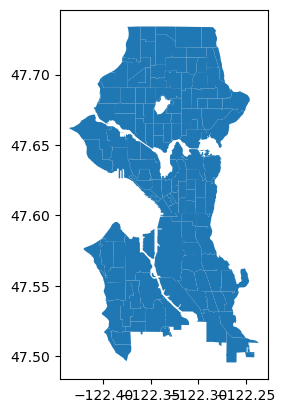

In [6]:
# visual representation
seattleMap.plot();

Once you have a map, your main concern should be detect the information on its coordinate system:

In [30]:
seattleMap.crs.to_epsg()

4326

In [8]:
# more detailed
seattleMap.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

It is always good to know the bounding box:

In [9]:
seattleMap.total_bounds

array([-122.43595826,   47.4955679 , -122.23592105,   47.7341467 ])

Let me create a map from the current map. I will **dissolve** the polygons so that only the main perimeter remains:

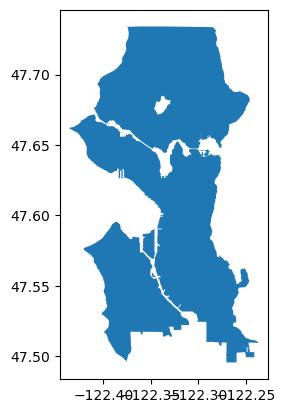

In [11]:
seattleMapBorder=seattleMap.dissolve()

#here it is
seattleMapBorder.plot();

Let me save the current maps in one file as a _geopackage_:

In [12]:
import os

seattleMapBorder.to_file(os.path.join("maps","seattle.gpkg"), layer='border', driver="GPKG")
seattleMap.to_file(os.path.join("maps","seattle.gpkg"), layer='tracts', driver="GPKG")

I have those maps sabed in disk and also in GitHub. You can read from the cloud easily:

In [13]:
# layers in the gpkg
import fiona

fileGPKG='https://github.com/CienciaDeDatosEspacial/code_and_data/raw/main/maps/seattle.gpkg'

#verify the layers present:
fiona.listlayers(fileGPKG)

['border', 'tracts']

<Axes: >

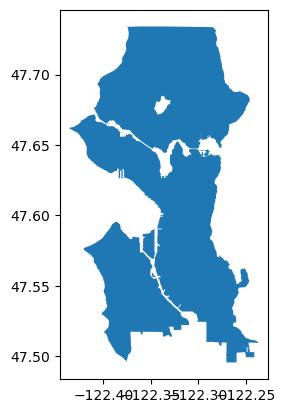

In [14]:
#plot one layer
gpd.read_file(fileGPKG, layer='border').plot()

<Axes: >

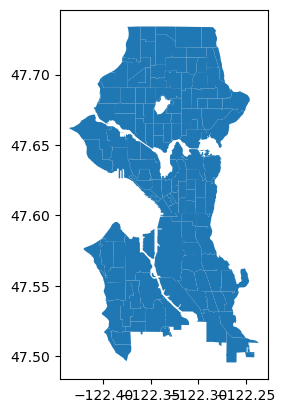

In [15]:
#another
gpd.read_file(fileGPKG, layer='tracts').plot()

Remember some operations can not work properly with the current projection (geodetic - in degrees):

In [16]:
# perimeter:
seattleMapBorder.length

/var/folders/2n/bkfhfqq16r78g3hf7pdj56y40000gn/T/ipykernel_54412/4124551980.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  seattleMapBorder.length


0    2.21871
dtype: float64

Let's use a planar projection (reproject the map):

In [17]:
seattleMapBorder.to_crs(3857).crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Then:

In [18]:
seattleMapBorder.to_crs(3857).length

0    297816.080886
dtype: float64

<Axes: >

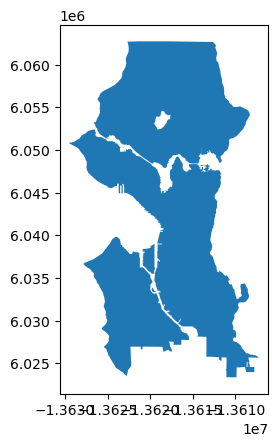

In [19]:
seattleMapBorder.to_crs(3857).plot()

Let me bring back a pandas data frame:

In [33]:
import pandas as pd

fileLink='https://github.com/CienciaDeDatosEspacial/code_and_data/raw/main/data/calls911.pkl'

calls911=pd.read_pickle(fileLink)

calls911.head()

,address,type,datetime,latitude,longitude,report_location,incident_number,date,year,month,month_name,day,weekday,hour,minute,nightTime
0,509 3rd Ave,Aid Response,2023-03-13 14:24:00,47.602114,-122.330809,"{'type': 'Point', 'coordinates': [-122.330809,...",F230031084,2023-03-13,2023,3,March,13,Monday,14,24,False
1,937 N 96th St,Aid Response,2023-03-13 14:21:00,47.698721,-122.346810,"{'type': 'Point', 'coordinates': [-122.34681, ...",F230031083,2023-03-13,2023,3,March,13,Monday,14,21,False
2,908 Jefferson St,Medic Response,2023-03-13 14:18:00,47.604879,-122.324007,"{'type': 'Point', 'coordinates': [-122.324007,...",F230031081,2023-03-13,2023,3,March,13,Monday,14,18,False
3,4535 17th Ave Ne,Aid Response,2023-03-13 14:13:00,47.661569,-122.309717,"{'type': 'Point', 'coordinates': [-122.309717,...",F230031080,2023-03-13,2023,3,March,13,Monday,14,13,False
4,724 26th Ave,Nurseline/AMR,2023-03-13 14:10:00,47.608238,-122.298865,"{'type': 'Point', 'coordinates': [-122.298865,...",F230031079,2023-03-13,2023,3,March,13,Monday,14,10,False


In [34]:
type(calls911)

pandas.core.frame.DataFrame

You may need to plot these points (events) on top of the our map. As the [documentation informs](https://dev.socrata.com/docs/datatypes/point.html#,), the lat/lon is already in WGS84. Let me keep the non-missing rows:

In [35]:
calls911=calls911[~calls911['report_location'].isna()]

In [36]:
#check format
calls911.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   address          1998 non-null   object        
 1   type             1998 non-null   object        
 2   datetime         1998 non-null   datetime64[ns]
 3   latitude         1998 non-null   float64       
 4   longitude        1998 non-null   float64       
 5   report_location  1998 non-null   object        
 6   incident_number  1998 non-null   object        
 7   date             1998 non-null   object        
 8   year             1998 non-null   int64         
 9   month            1998 non-null   int64         
 10  month_name       1998 non-null   object        
 11  day              1998 non-null   int64         
 12  weekday          1998 non-null   object        
 13  hour             1998 non-null   int64         
 14  minute           1998 non-null   int64  

Let's plot the coordinates:

<Axes: xlabel='longitude', ylabel='latitude'>

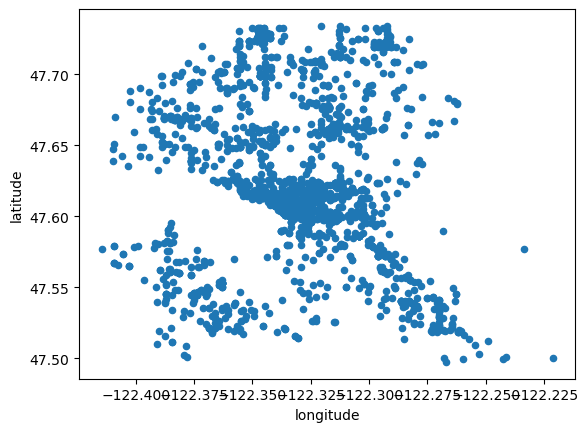

In [37]:
calls911.plot.scatter(x = 'longitude', y = 'latitude')

This scatter plot does not seem right, but it will look better when combined with a base map:

<Axes: xlabel='longitude', ylabel='latitude'>

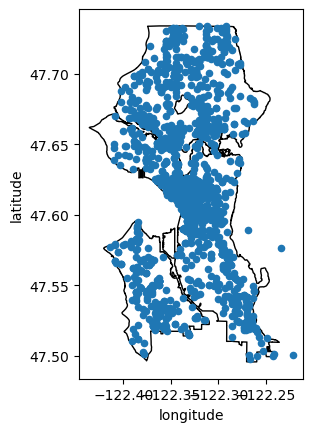

In [38]:
base = seattleMapBorder.plot(color='white', edgecolor='black')

calls911.plot.scatter(x = 'longitude', y = 'latitude',ax=base)

However, changing the coordinate system will not give a good result: 

<Axes: xlabel='longitude', ylabel='latitude'>

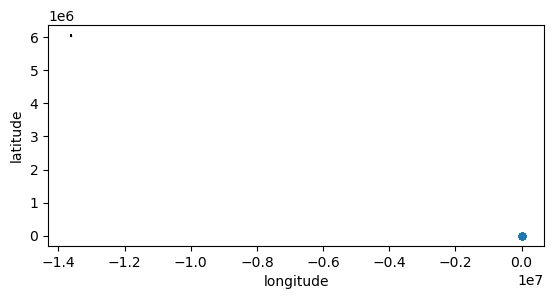

In [39]:
base = seattleMapBorder.to_crs(3857).plot(color='white', edgecolor='black')

calls911.plot.scatter(x = 'longitude', y = 'latitude',ax=base)

Since **calls911** is not a geodataframe, we can not reproject the data:

In [ ]:
# base = seattleMapBorder.to_crs(3857).plot(color='white', edgecolor='black')

# calls911.to_crs(3857).plot.scatter(x = 'longitude', y = 'latitude',ax=base)

The solution is to format the **calls911** intoa geodataframe:

In [40]:
# step one: create the geometry column:

from shapely.geometry import Point

calls911['report_location']=gpd.GeoSeries([Point(point['coordinates']) for point in calls911['report_location']],
                                   crs=str(seattleMapBorder.crs.to_epsg()))

In [58]:
# step two: create the geodataframe
calls911_gdf = gpd.GeoDataFrame(calls911, #pandas dataframe
                               geometry='report_location') # the previous step

# see

calls911_gdf.head()

,address,type,datetime,latitude,longitude,report_location,incident_number,date,year,month,month_name,day,weekday,hour,minute,nightTime
0,509 3rd Ave,Aid Response,2023-03-13 14:24:00,47.602114,-122.330809,POINT (-122.33081 47.60211),F230031084,2023-03-13,2023,3,March,13,Monday,14,24,False
1,937 N 96th St,Aid Response,2023-03-13 14:21:00,47.698721,-122.346810,POINT (-122.34681 47.69872),F230031083,2023-03-13,2023,3,March,13,Monday,14,21,False
2,908 Jefferson St,Medic Response,2023-03-13 14:18:00,47.604879,-122.324007,POINT (-122.32401 47.60488),F230031081,2023-03-13,2023,3,March,13,Monday,14,18,False
3,4535 17th Ave Ne,Aid Response,2023-03-13 14:13:00,47.661569,-122.309717,POINT (-122.30972 47.66157),F230031080,2023-03-13,2023,3,March,13,Monday,14,13,False
4,724 26th Ave,Nurseline/AMR,2023-03-13 14:10:00,47.608238,-122.298865,POINT (-122.29887 47.60824),F230031079,2023-03-13,2023,3,March,13,Monday,14,10,False


In [59]:
# see
calls911_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1998 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   address          1998 non-null   object        
 1   type             1998 non-null   object        
 2   datetime         1998 non-null   datetime64[ns]
 3   latitude         1998 non-null   float64       
 4   longitude        1998 non-null   float64       
 5   report_location  1996 non-null   geometry      
 6   incident_number  1998 non-null   object        
 7   date             1998 non-null   object        
 8   year             1998 non-null   int64         
 9   month            1998 non-null   int64         
 10  month_name       1998 non-null   object        
 11  day              1998 non-null   int64         
 12  weekday          1998 non-null   object        
 13  hour             1998 non-null   int64         
 14  minute           1998 non-null  

Let's plot both:

<Axes: >

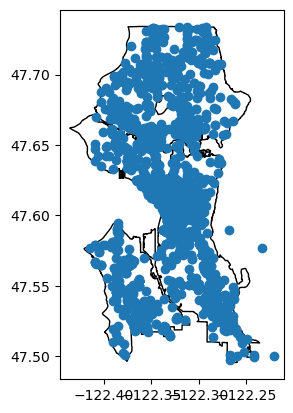

In [60]:
base = seattleMapBorder.plot(color='white', edgecolor='black')

calls911_gdf.plot(ax=base)

The previous result confirms they have the same coordinate system:

In [61]:
calls911_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

You can reproject both:

<Axes: >

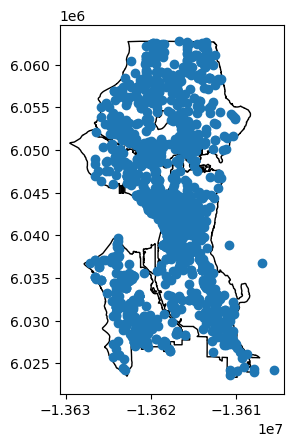

In [62]:
base = seattleMapBorder.to_crs(3857).plot(color='white', edgecolor='black')

calls911_gdf.to_crs(3857).plot(ax=base)

You can use the lon/lat information instead:

In [63]:
pointsAsGeometry=gpd.points_from_xy(calls911.longitude,
                                    calls911.latitude,crs="4326")

calls911_gdf2= gpd.GeoDataFrame(calls911.drop(columns='report_location'),
                                geometry=pointsAsGeometry)

# check:

calls911_gdf2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Let's redo the previous _failed_ plot:

<Axes: >

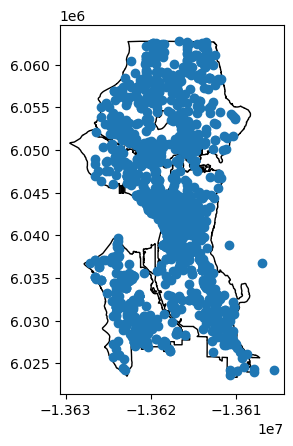

In [64]:
base = seattleMapBorder.to_crs(3857).plot(color='white', edgecolor='black')

calls911_gdf2.to_crs(3857).plot(ax=base)

What if some points are outside the map?

It might mean a 911 call was done outside the city limits. If you wished to subset the events to the **bounding box**, you can clip:

<Axes: >

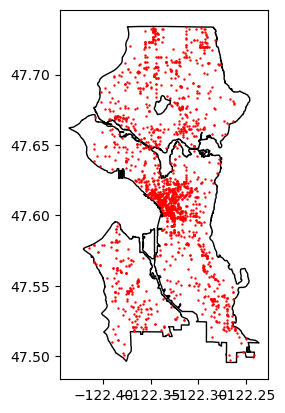

In [65]:
calls911_gdf_clipped = gpd.clip(gdf=calls911_gdf,
                               mask=seattleMapBorder)

###

base = seattleMapBorder.plot(color='white', edgecolor='black')

calls911_gdf_clipped.plot(ax=base,
                         color='red',
                         markersize=0.5)

We could save this spatial points in our Seattle package, but there is one problem: you can not save **datetime** data type 

In [66]:
calls911_gdf.datetime[0]

Timestamp('2023-03-13 14:24:00')

In [67]:
calls911_gdf.date[0]

datetime.date(2023, 3, 13)

We can format those values back to strings:

In [68]:
calls911_gdf[['datetime','date']]=calls911_gdf[['datetime','date']].apply(lambda x:x.astype(str))

In [70]:
# check
calls911_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1998 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   address          1998 non-null   object  
 1   type             1998 non-null   object  
 2   datetime         1998 non-null   object  
 3   latitude         1998 non-null   float64 
 4   longitude        1998 non-null   float64 
 5   report_location  1996 non-null   geometry
 6   incident_number  1998 non-null   object  
 7   date             1998 non-null   object  
 8   year             1998 non-null   int64   
 9   month            1998 non-null   int64   
 10  month_name       1998 non-null   object  
 11  day              1998 non-null   int64   
 12  weekday          1998 non-null   object  
 13  hour             1998 non-null   int64   
 14  minute           1998 non-null   int64   
 15  nightTime        1998 non-null   bool    
dtypes: bool(1), float64(2), geometry(1

Let's create a new geopackage file:

In [71]:
whereGeo=os.path.join("maps","seattlePolyPoints.gpkg")
calls911_gdf.to_file(whereGeo, layer='calls', driver="GPKG")
seattleMapBorder.to_file(os.path.join("maps","seattle.gpkg"), layer='border', driver="GPKG")
seattleMap.to_file(os.path.join("maps","seattle.gpkg"), layer='tracts', driver="GPKG")

Let me retrieve this map from its location